In [3]:
%cd "../"
%pwd

import numpy as np
import matplotlib.pyplot as plt

import io 
import pandas as pd  
import pyreadr

from load_data import *
from pred_score import *
from Filter_FS import *
from hybrid_FS import *
from overlap_genes import *
from crossValidation import *

/Users/dormann/Documents/GitHub/src


In [4]:
#Fixing seed to get reproducible results
random.seed(3)
np.random.seed(3)

# Baseline with preselected genes 

In [5]:
#Load preprocess data
AE4 = np.array(pd.read_csv ('../data/processed_data/AE4.csv'))
y = np.array(AE4[:,-1],dtype=int)
AE4 = AE4[:,0:-1]


In [6]:
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE4,y)

In [7]:
print(AE4.shape, len(pred))
acc = model.score_
print(acc)

(1473, 9870) 1473
0.05642420122365738


In [6]:
print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (93.0, 1816.0, 0.051211453744493395, 0.16970802919708028, 0.9925993544811398, 0.04871660555264536, 0.9981354216610729, 0.9512833944473547, 0.8302919708029197)


# Mutual information maximizer (MIM)

test 0.220035478596429 0.01660935899779797
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (273.0, 1687.0, 0.16182572614107885, 0.4032496307237814, 0.9928434163248164, 0.1392857142857143, 0.9982767739844056, 0.8607142857142858, 0.5967503692762186)


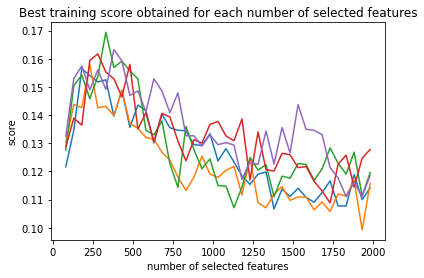

In [7]:
#Define parameters for MIM method
N = np.arange(80,2000,50)
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_neighbors': 3, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,AE4, FamiliesClusters, compute_precision,True, 5,  MIM, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = AE4[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Anova F test

test 0.23137495623700866 0.0159063824190214
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (286.0, 1656.0, 0.17270531400966183, 0.4218289085545723, 0.9931654409033505, 0.14727085478887744, 0.9983736734236663, 0.8527291452111225, 0.5781710914454278)


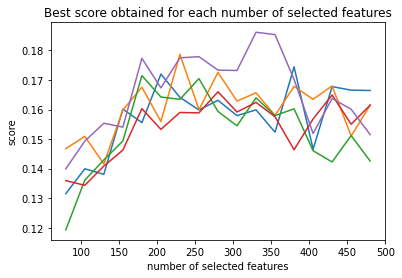

In [8]:
#Define parameters for ANOVA method
N = np.arange(80,500,25)
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,AE4, FamiliesClusters, compute_precision,True, 5,  ANOVA, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = AE4[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))    

In [9]:
#Create .csv with names of this subset
best_subset = subset
get_best_genes_names(best_subset, '../data/processed_data/AE4genes_interest.csv', '../data/optimized_subsets/AE4genes_best.csv')

# Without Cross-validation

250 0.187248322147651


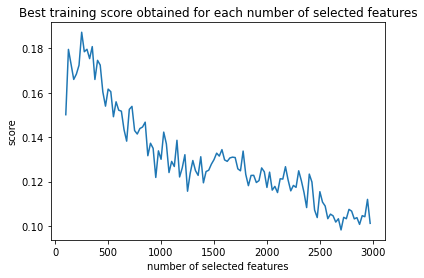

In [9]:
N = np.arange(100,3000,25)
best_subset, best_score = MIM(y, AE4, FamiliesClusters, compute_precision,True, N, 3, plot=True) 
print(len(best_subset), best_score)

In [10]:
#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = AE4[:, best_subset]
pred = model.fit_predict(x_subset,y)
print(model.score_, model.recovery)

subset = np.ones((len(best_subset),))
subsets = subsampling_genes(subset, 101, 0.25)

model = EnsemblingHierarchical(np.unique(y),compute_precision,True,subsets = subsets, ensembling='voting', threshold_voting = 0.5)
result  = model.fit_predict(X = x_subset, y= y)
print(model.score_, model.recovery)

0.187248322147651 0.9368635437881874
0.5274151436031331 0.3713509843856076


251 0.1952542372881356


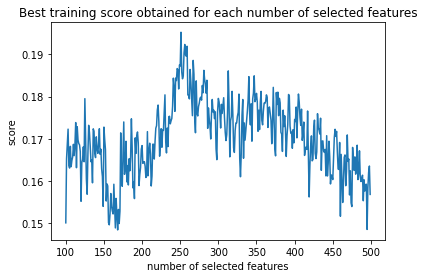

In [17]:
N = np.arange(100,500,1)
best_subset, best_score = MIM(y, AE4, FamiliesClusters, compute_precision,True, N, 3, plot=True) 
print(len(best_subset), best_score)

In [18]:
#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = AE4[:, best_subset]
pred = model.fit_predict(x_subset,y)
print(model.score_, model.recovery)

subset = np.ones((len(best_subset),))
subsets = subsampling_genes(subset, 101, 0.25)

model = EnsemblingHierarchical(np.unique(y),compute_precision,True,subsets = subsets, ensembling='voting', threshold_voting = 0.5)
result  = model.fit_predict(X = x_subset, y= y)
print(model.score_, model.recovery)

0.1952542372881356 0.9327902240325866
0.5395095367847411 0.35980991174473864


In [19]:
MIM_sub = best_subset

In [20]:
get_best_genes_names(MIM_sub, '../data/processed_data/AE4genes_interest.csv', '../data/optimized_subsets/AE4genes_best1.csv')

300 0.19534555712270804


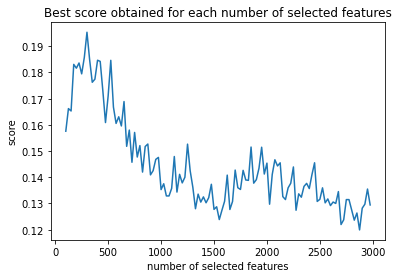

In [13]:
N = np.arange(100,3000,25)
best_subset, best_score = ANOVA(y, AE4, FamiliesClusters, compute_precision,True, N, plot=True)
print(len(best_subset), best_score)

In [14]:
#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = AE4[:, best_subset]
pred = model.fit_predict(x_subset,y)
print(model.score_, model.recovery)

subset = np.ones((len(best_subset),))
subsets = subsampling_genes(subset, 101, 0.25)

model = EnsemblingHierarchical(np.unique(y),compute_precision,True,subsets = subsets, ensembling='voting', threshold_voting = 0.5)
result  = model.fit_predict(X = x_subset, y= y)
print(model.score_, model.recovery)

0.19534555712270804 0.902919212491514
0.5157068062827225 0.38424983027834353


In [15]:
ANOVA_sub = best_subset

In [16]:
get_best_genes_names(ANOVA_sub, '../data/processed_data/AE4genes_interest.csv', '../data/optimized_subsets/AE4genes_best2.csv')

# Hybrid methods

# Mutual information and stimulated annealing

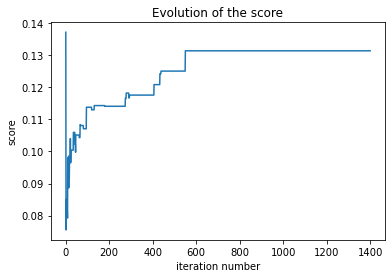

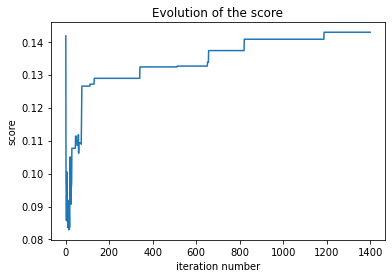

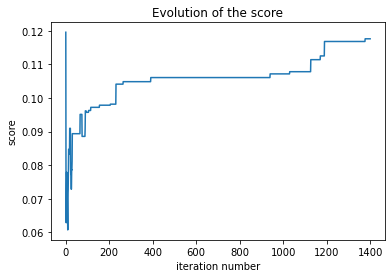

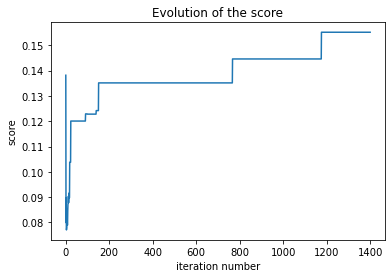

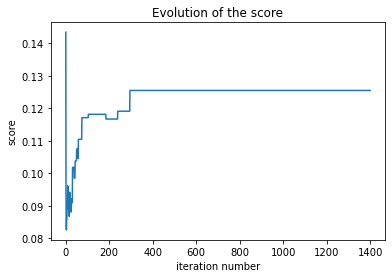

test 0.16420240512860115 0.017656660361167035
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (186.0, 1740.0, 0.10689655172413794, 0.3089700996677741, 0.992601160002041, 0.09657320872274143, 0.9982210666757894, 0.9034267912772586, 0.6910299003322259)


In [11]:
#Define parameters for MI + stimulated annealing method
N = np.array([700])
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_iter': 1400, 'n_neighbors': 3, 'p_mutate': 0.1, 'c': 1, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,AE4, FamiliesClusters, compute_precision,True, 5,  MI_stimulated_annealing, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = AE4[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred)) 